<a href="https://colab.research.google.com/github/Bortkivskiy/assignment-2-text-processing-and-nlp-Bortkivskiy/blob/main/tasks2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Підготовка середовища та створення тестових даних

In [8]:
# Встановлення необхідних пакетів, якщо вони не встановлені
!pip install autocorrect
!pip install wordcloud
!pip install nltk
!pip install gensim

# Імпорти
import pandas as pd
import numpy as np
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from autocorrect import Speller
import nltk
from wordcloud import WordCloud
import json
import gensim as gs
from gensim.models import Word2Vec
import gensim.downloader as api
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Завантаження ресурсів NLTK
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Створення тестового JSON-файлу з текстовими даними
data = [
    {"text": "This is the first example text."},
    {"text": "Here is another example of text for analysis."},
    {"text": "The final example text provides different content."}
]

with open('data.json', 'w') as file:
    json.dump(data, file)

# Інші частини коду залишаються без змін


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622364 sha256=c148da290045ec07cc55c7fe534a1a5312b262217fa1657ef95e97b87b44cc75
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Функція для завантаження даних із JSON-файлу

In [9]:
def extract_texts_from_file(file_path):
    """
    Завантажує текстові дані з JSON-файлу.

    Args:
        file_path (str): Шлях до JSON-файлу.

    Returns:
        list: Список текстів у вигляді рядків.
    """
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)

    # Витягування тексту з кожного запису
    texts = [entry["text"] for entry in data]
    return texts

texts = extract_texts_from_file('data.json')
print(texts)


['This is the first example text.', 'Here is another example of text for analysis.', 'The final example text provides different content.']


Функція для обробки текстів

In [10]:
def process_texts(texts):
    """
    Обробляє тексти: перетворює на нижній регістр, прибирає пунктуацію, числа, спеціальні символи,
    виправляє орфографію, виконує лематизацію і видаляє стоп-слова.

    Args:
        texts (list): список рядків для обробки.

    Returns:
        list: Список оброблених текстів.
    """
    # Ініціалізація необхідних інструментів
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    spell = Speller()

    processed_texts = []
    for text in texts:
        # Перетворення на нижній регістр
        text = text.lower()

        # Видалення пунктуації та спеціальних символів
        text = ''.join([char for char in text if char not in string.punctuation and not char.isdigit()])

        # Токенізація та видалення стоп-слів
        words = [word for word in word_tokenize(text) if word not in stop_words]

        # Орфографічна корекція та лематизація
        words = [lemmatizer.lemmatize(spell(word)) for word in words]

        processed_texts.append(' '.join(words))

    return processed_texts

texts_processed = process_texts(texts)
print(texts_processed)


['first example text', 'another example text analysis', 'final example text provides different content']


Візуалізація текстів як хмари слів

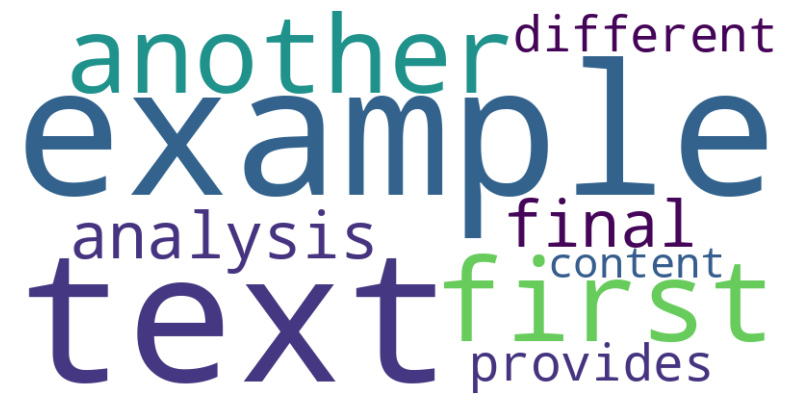

In [11]:
def visualize_texts(texts_processed):
    """
    Візуалізує тексти у вигляді хмари слів.

    Args:
        texts_processed (list): Список оброблених текстів.

    Returns:
        None
    """
    all_text = ' '.join(texts_processed)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

visualize_texts(texts_processed)


Обчислення TF-IDF та косинусної подібності

In [12]:
def calculate_tfidf(texts_processed):
    """
    Обчислює TF-IDF та косинусну подібність між текстами.

    Args:
        texts_processed (list): Список оброблених текстів.

    Returns:
        np.ndarray: Матриця косинусної подібності.
    """
    # Обчислення TF-IDF
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(texts_processed)

    # Обчислення косинусної подібності
    cosine_matrix = cosine_similarity(tfidf_matrix)
    return cosine_matrix

cosine_matrix = calculate_tfidf(texts_processed)
print(cosine_matrix)


[[1.         0.32600383 0.24704458]
 [0.32600383 1.         0.19597778]
 [0.24704458 0.19597778 1.        ]]


Візуалізація матриці косинусної подібності як теплової карти

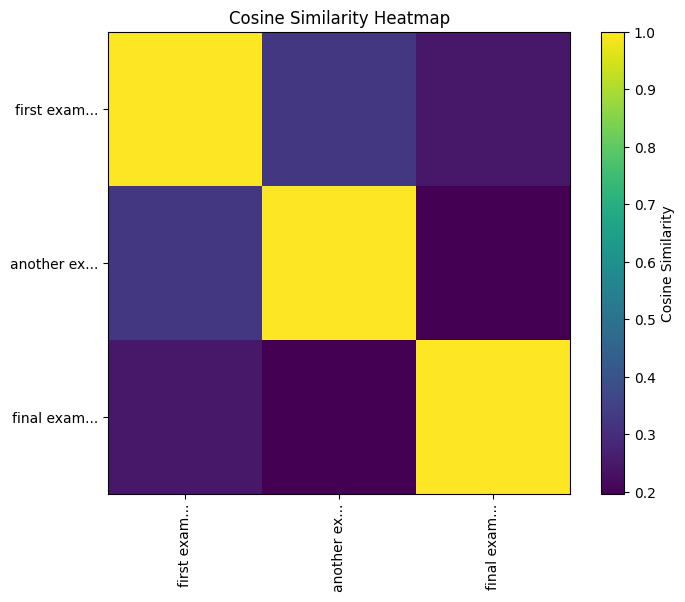

In [13]:
def visualize_data(cosine_matrix, texts_processed):
    """
    Візуалізує матрицю косинусної подібності у вигляді теплової карти.

    Args:
        cosine_matrix (np.ndarray): Матриця косинусної подібності.
        texts_processed (list): Список оброблених текстів.

    Returns:
        None
    """
    plt.figure(figsize=(8, 6))
    plt.imshow(cosine_matrix, cmap='viridis', interpolation='nearest')
    plt.colorbar(label='Cosine Similarity')
    plt.xticks(range(len(texts_processed)), [text[:10] + '...' for text in texts_processed], rotation=90)
    plt.yticks(range(len(texts_processed)), [text[:10] + '...' for text in texts_processed])
    plt.title('Cosine Similarity Heatmap')
    plt.show()

visualize_data(cosine_matrix, texts_processed)


Аналіз власного тексту (наприклад, отриманого з інтернету)

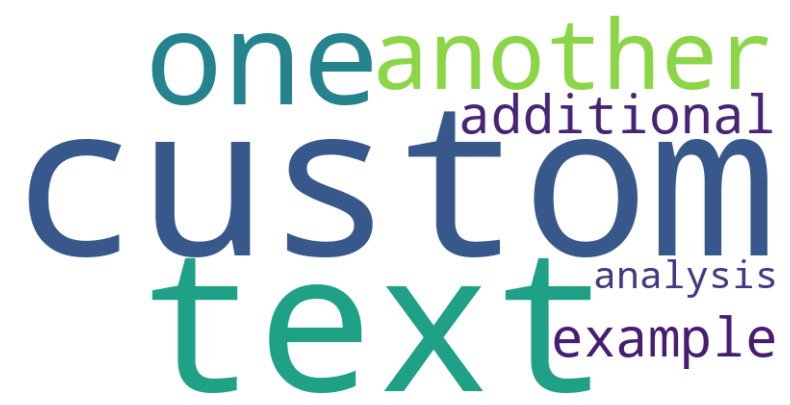

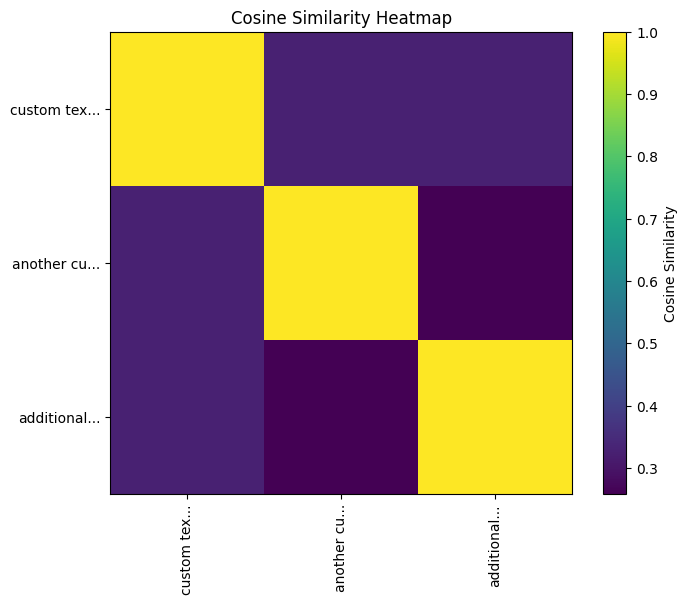

In [14]:
# Вставте власний текст тут
def get_texts():
    return ["Custom text one.", "Another custom example text.", "Additional custom text for analysis."]

# Аналіз нових текстів
texts = get_texts()
texts_processed = process_texts(texts)
visualize_texts(texts_processed)
cosine_matrix = calculate_tfidf(texts_processed)
visualize_data(cosine_matrix, texts_processed)
